# New York Subway and Weather Data 

Working with 2D data with numpy and pandas.

### Questions 

* What variables area related to subway ridership? 
    * What stations have the most riders?
    * What are the ridership patterns over time? On weekends Holidays? 
    * How does the weather affect ridership?
* What patterns can I find in the weather?
    * How does the weather vary across the city? 
    * How does the temperature rise throughout the month?


In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Storing 2D Data 

* Pure python: Lists of lists 
* NumPy: 2D array (more memory efficent, accessing elements differ in syntax) 
* Pandas : Dataframe 

### Storing 2D Data : NumPy 


In [2]:
# Sample Numpy 2D array: Subway ridership for 5 stations and 10 days
# Columns represent train stations, and rows represent days

ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Check type of 2D array
ridership.dtype

dtype('int64')

Working with Numpy 2D arrays: 

* Station with max number of riders on day 1 and the mean riders per day (mean_for_max)
* For all days and stations what is the mean ridership overall? (overall_mean)

In [3]:
def mean_riders_for_max_station(ridership):
    # Max riders on day 1
    max_station = ridership[0,:].argmax()            # argmax returns position
    # Mean riders per day for max_station
    mean_for_max = ridership[:, max_station].mean()
    overall_mean = ridership.mean()
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

Station with higher ridership on day1 had a higher ridership than average. This is interesting but not useful.

###### Use NumPy's axis function to find more practical results:
* Mean ridership per day for each subway station
* Maximum and minimum ridership for each day for each subway station

In [4]:
def min_and_max_riders_per_day(ridership):
    # Mean per day for each station 
    station_riders = ridership.mean(axis = 0)      #selects columns 
    
    max_daily_ridership = station_riders.max()
    min_daily_ridership = station_riders.min() 
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

The station with the max daily ridership had 3239 riders.
The station with the min daily ridership had 1071 riders.

### Storing 2D Data : Pandas Dataframes

Recreate the sample 2D numpy array using a pandas dataframe. Advantages of a pandas dataframe over a 2D NumPy array includes the following:
* Indexs for rows 
* Name for columns 
* Different data types for each column 

In [5]:
# Create a pandas df
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Print df
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


Mean ridership for each station (column).

In [6]:
# Mean of each column 
ridership_df.mean()

R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64

Mean ridership for each day (row).

In [7]:
# Mean of each row 
ridership_df.mean(axis = 1)

05-01-11       1.4
05-02-11    2779.2
05-03-11    3768.8
05-04-11    3235.6
05-05-11    3504.8
05-06-11    3416.4
05-07-11     255.2
05-08-11       6.0
05-09-11    3040.2
05-10-11    3418.4
dtype: float64

Accessing a station (column) of the dataframe using "iloc"

In [8]:
#ridership_df.iloc['R007'] --> This is wrong
print ridership_df.iloc[4]
print ridership_df['R007'] # prints beginning of column

R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    2539
05-03-11    2691
05-04-11    2613
05-05-11    2705
05-06-11    2685
05-07-11     201
05-08-11       0
05-09-11    2215
05-10-11    3033
Name: R007, dtype: int64


Accessing a day (row/index) of the dataframe using "loc"

In [9]:
ridership_df.loc['05-09-11']

R003    1438
R004    3785
R005    3589
R006    4174
R007    2215
Name: 05-09-11, dtype: int64

Accessing a day/station (row/column) of the dataframe using "iloc" or "loc"

In [10]:
# Two methods
print ridership_df.iloc[0,3]
print ridership_df.loc['05-01-11', 'R006']

5
5


Get a 2D Numpy array from a Pandas Dataframe:

This will output a 2D array with no rows or columns. Useful for taking the mean of all the values. Make sure data types are consistent.

In [11]:
print ridership_df.values
print ridership_df.values.mean()

[[   0    0    2    5    0]
 [1478 3877 3674 2328 2539]
 [1613 4088 3991 6461 2691]
 [1560 3392 3826 4787 2613]
 [1608 4802 3932 4477 2705]
 [1576 3933 3909 4979 2685]
 [  95  229  255  496  201]
 [   2    0    1   27    0]
 [1438 3785 3589 4174 2215]
 [1342 4043 4009 4665 3033]]
2342.6


In [12]:
# Maxmimum number of riders on the first day 
ridership_df.iloc[0].argmax()

'R006'

We rewrite the mean_riders_for_max_station function, but this time the input is a Pandas DataFrame rather than a 2D NumPy array. The main differences:
* iloc[0] instead of [0,:] to access a row
* [max_station] instead of [:, max_station] to access a column
* .values.mean() instead of .mean() to get the overall mean instead of a series of means

In [13]:
def mean_riders_for_max_station(ridership):
    # Max riders on day 1 station
    max_station = ridership.iloc[0].argmax()     
    # Mean riders per day for max station
    mean_for_max = ridership[max_station].mean()
    overall_mean = ridership.values.mean()
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)

Same result regardless of whether we used numpy arrays or pandas dataframe. 

Loading Data into a Dataframe


In [33]:
# Read in file
subway_df = pd.read_csv('nyc_subway_weather.csv')

Instead of printing all the rows of the data, print the first 4 rows only using .head().

In [15]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


Use the describe() function to see some statistics about each column.

In [16]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


Linear correlation between two variables using pearson's r



In [17]:
def correlation(x, y):
    '''
    Computes the correlation between the two input variables. 
    Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)
print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


### Hourly entries and exits by riders 

The subway data included the cummulative number of entries and exits by riders. It did not include the hourly number of entries and exits.

Function that converts total entries and exits to hourly entries and exits

In [18]:
# Cumulative entries and exits for one station for a few hours.
# Sample data 
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Function takes a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    # Pandas has a builtin "shift" function along with vectorized operations
    # Note first row will return NaN since we have to previous data for that row
    return entries_and_exits - entries_and_exits.shift(1)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [19]:
# Example dataframe 
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

print example_df
    
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups
    
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups
    
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()
    
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4
{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}
{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}
       above_three  value
even                     
False          0.0      5
True           3.0     16
even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


### Ridership by hours of a day 

Entries are from different days from different stations.
Need to seperate riderships by hour, then take the average ridership for each hour.   


In [20]:
# Check where information is stored
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [21]:
# Group by day of the week and take the mean
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


We get the mean value of the column for each day of the week.

Let's focus on the ENTRIESn_hourly column: 

In [22]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

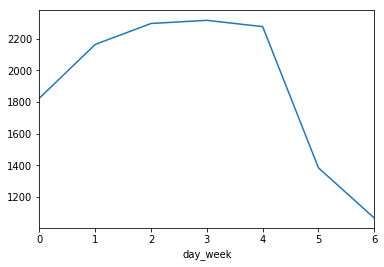

In [23]:
ridership_by_day.plot()

Notice how ridership is significantly lower on days 5 and 6 or Saturday and Sunday. This makes sense as less people use the subway on the weekends.

### Does rain affect ridership?
Group data by hour of day and rain.


### Does day of the week affect ridership? 
Group by the day of the week and take the average ridership 

### Calculating Hourly Entries

To calculate the hourly entries and exits, we will need to group by station and day first. Then, for each day we can calculate the hourly entires and exits.

Note: The data recorded the total sum of entires on each station at four hour intervals. For the sample code, we are looking at the differences between consecutive measurements on each station for each four hour recording entry.

In [24]:
values = np.array([1, 3, 2, 4, 1, 6, 4])

example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


# Standardize each group
def standardize(xs):
    return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby('even')
print grouped_data['value'].apply(standardize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [25]:
# Find second largest value in each group
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby('even')
print grouped_data['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64


In [26]:
# Example dataframe with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})


In [27]:
def hourly_for_group(entries_and_exits):
    '''
    Takes a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    '''
    return entries_and_exits - entries_and_exits.shift(1)

# Note we need to specifically select the Entries and Exits columns from UNIT
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)


# Note there will be two rows of NaN where we could not make comparisons

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


### Merge Subway and Weather data into a single data frame 

We will need to match up rows from the two data frames. Common columns for the two would be DATEn, hour, latitude, and longitude 

In [28]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Function takes  2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return None

In [29]:
subway_df.head(3)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564


In [30]:
weather_df.head(3)

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9


In [31]:
subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'], how= 'inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


### Plotting Dataframes 

* Histogram of subway ridership on days with rain and days without rain 
* Scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size 
* Scatterplot with subway ridership compared to precipitation 
* Scatterplot with subway ridership compared to temperature 

Scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size.

Need to group data by latitude and longitude and find the mean ridership for each location.

In [32]:
# Latitude and longitude are now rows ( not columns), need to set as_index = False
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index = False).mean()

# Scale hourly entries
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                  data_by_location['ENTRIESn_hourly'].std())
# Matplotlib marker size takes arguments
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s = scaled_entries)

KeyError: 'ENTRIESn_hourly'

In [ ]:
# Scale hourly entries
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                  data_by_location['ENTRIESn_hourly'].std())

In [ ]:
# Matplotlib marker size takes argument s
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s = scaled_entries)

Can notice that certain areas of New York has higher ridership.